In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config Completer.use_jedi = False        # For autocomplete to work!

In [2]:
sns.set(rc={'figure.figsize':(8,5)})
sns.set_style('whitegrid')
sns.set_palette('Set2')

# The Data

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

In [3]:
from tensorflow.keras.datasets import cifar10

In [4]:
(X_train, y_train),(X_test, y_test)=cifar10.load_data()

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
# Notice 3 color channels

In [7]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

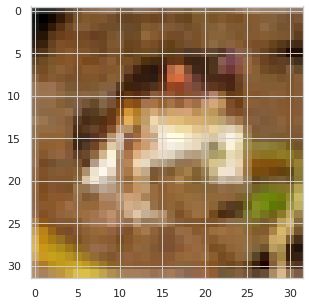

In [8]:
plt.imshow(X_train[0])

In [9]:
# If we really try we can see a frog!

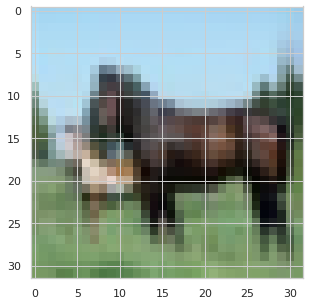

In [10]:
plt.imshow(X_train[12])

In [11]:
# Maybe a horse...

# PreProcessing

In [12]:
X_train[0].max()

255

In [13]:
X_train = X_train/255
X_test = X_test/255

In [14]:
X_train[0].max()

1.0

In [15]:
X_test.shape

(10000, 32, 32, 3)

In [16]:
# 10000 images in test set

## Labels

One-hot encoding.

In [17]:
from tensorflow.keras.utils import to_categorical

In [18]:
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [19]:
y_train[0]

array([6], dtype=uint8)

Check [here](https://www.cs.toronto.edu/~kriz/cifar.html) for label of each figure. Ex.: label 6 corresponds to a frog.

----------
# Building the Model

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

As images get more copmlex, it is a good ideia to add more convolutional and pooling layers (compared to MNIST).

In [21]:
model = Sequential()

# Convolutional layer
model.add(Conv2D(filters=32, kernel_size=(4,4), strides=(1,1), padding='valid',
                 input_shape=(32,32,3), activation = 'relu'))
# Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

# Convolutional layer
model.add(Conv2D(filters=32, kernel_size=(4,4), strides=(1,1), padding='valid',
                 input_shape=(32,32,3), activation = 'relu'))
# Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

# Flattening
model.add(Flatten())

# Final dense layer
model.add(Dense(256, activation='relu'))

# Final output layer
model.add(Dense(10, activation='softmax'))

# Compile
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [25]:
model.fit(X_train,y_cat_train, epochs = 20,
          validation_data=(X_test,y_cat_test),
          callbacks=[early_stop])

Epoch 1/20
1563/1563 [==============================] - 28s 18ms/step - loss: 1.4859 - accuracy: 0.4621 - val_loss: 1.2653 - val_accuracy: 0.5556
Epoch 2/20
1563/1563 [==============================] - 32s 20ms/step - loss: 1.1587 - accuracy: 0.5915 - val_loss: 1.1055 - val_accuracy: 0.6108
Epoch 3/20
1563/1563 [==============================] - 32s 21ms/step - loss: 1.0075 - accuracy: 0.6487 - val_loss: 1.0512 - val_accuracy: 0.6287
Epoch 4/20
1563/1563 [==============================] - 32s 20ms/step - loss: 0.8933 - accuracy: 0.6893 - val_loss: 1.0380 - val_accuracy: 0.6392
Epoch 5/20
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8020 - accuracy: 0.7211 - val_loss: 0.9884 - val_accuracy: 0.6657
Epoch 6/20
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7243 - accuracy: 0.7481 - val_loss: 0.9817 - val_accuracy: 0.6703
Epoch 7/20
1563/1563 [==============================] - 25s 16ms/step - loss: 0.6563 - accuracy: 0.7714 - val_loss: 0.9807 -

In [26]:
metrics = pd.DataFrame(model.history.history)

In [27]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.485943,0.46210,1.265288,0.5556
1,1.158676,0.59154,1.105522,0.6108
2,1.007477,0.64874,1.051223,0.6287
3,0.893284,0.68932,1.038044,0.6392
4,0.801994,0.72114,0.988416,0.6657
5,0.724306,0.74808,0.981659,0.6703
6,0.656339,0.77138,0.980750,0.6758
7,0.589728,0.79390,1.052196,0.6690
8,0.537564,0.81140,1.083971,0.6658


In [28]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

<AxesSubplot:>

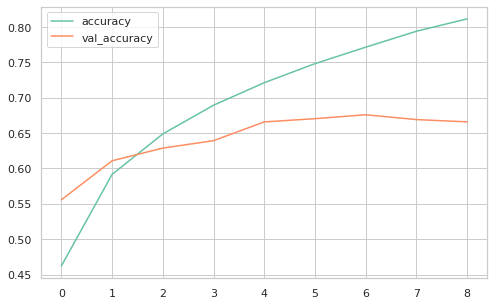

In [29]:
metrics[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

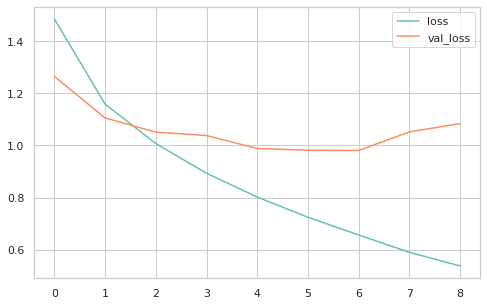

In [30]:
metrics[['loss','val_loss']].plot()

In [31]:
model.evaluate(X_test, y_cat_test, verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 1.0840 - accuracy: 0.6658


[1.083970546722412, 0.6657999753952026]

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
predictions = np.argmax(model.predict(X_test), axis=-1)

In [37]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.69      0.73      1000
           1       0.82      0.75      0.78      1000
           2       0.55      0.57      0.56      1000
           3       0.47      0.45      0.46      1000
           4       0.64      0.62      0.63      1000
           5       0.46      0.68      0.55      1000
           6       0.78      0.72      0.75      1000
           7       0.74      0.68      0.71      1000
           8       0.86      0.70      0.77      1000
           9       0.72      0.80      0.76      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



In [38]:
confusion_matrix(y_test, predicitions)

array([[687,  28,  61,  29,  27,  29,  19,  14,  56,  50],
       [ 19, 747,  16,  18,   7,  20,  18,   8,  10, 137],
       [ 54,   4, 574,  69,  79, 118,  48,  30,  10,  14],
       [  5,   8,  75, 450,  59, 290,  53,  38,   4,  18],
       [ 13,   3, 100,  76, 619,  87,  27,  62,   8,   5],
       [  9,   3,  68, 133,  40, 683,  10,  45,   1,   8],
       [  2,   8,  68,  76,  45,  66, 717,  10,   3,   5],
       [  5,   5,  40,  48,  61, 135,   5, 684,   1,  16],
       [ 65,  46,  25,  42,  17,  29,  13,   8, 698,  57],
       [ 16,  63,  13,  24,  11,  20,  10,  24,  20, 799]])

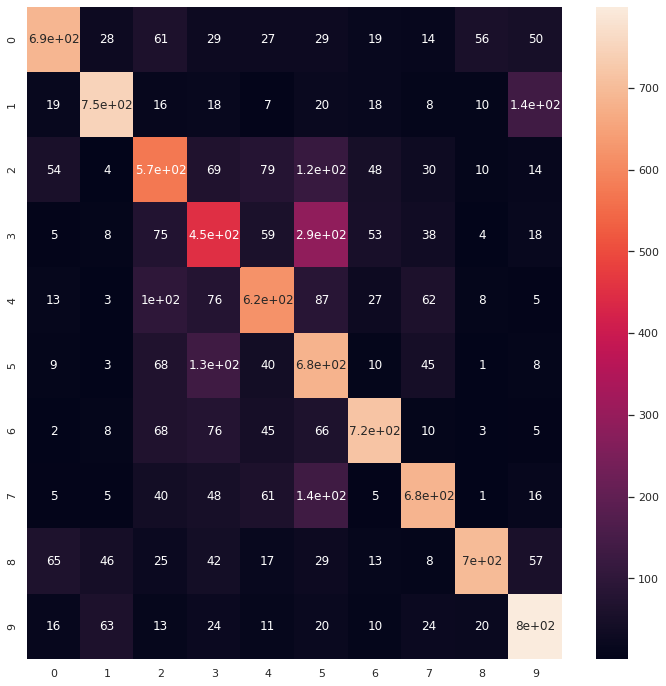

In [39]:
plt.figure(figsize=(12,12))
sns.heatmap(confusion_matrix(y_test, predicitions), annot=True);

# Predicting a given image

In [40]:
my_image = X_test[0]

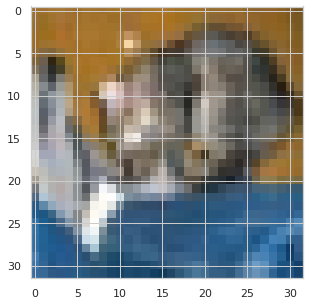

In [42]:
plt.imshow(my_image);

In [43]:
# What is this????
# Checking it out:
y_test[0]

array([3], dtype=uint8)

In [44]:
# 3 --> cat

In [45]:
np.argmax(model.predict(my_image.reshape(1,32,32,3)), axis=-1)

array([3])

So, the model predicted correctly! I couldn't...

Let's check a different image.

In [46]:
my_image = X_test[16]

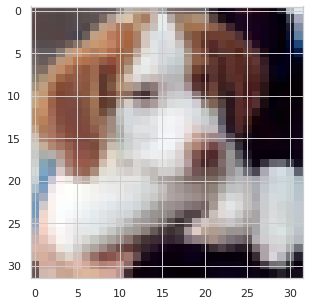

In [47]:
plt.imshow(my_image);

Clearly a dog!

In [48]:
np.argmax(model.predict(my_image.reshape(1,32,32,3)), axis=-1)

array([5])